## 用到的库sklearn
-- pip install sklearn
-- 如果用的是anaconda，它就自带了

In [3]:
# 引入sklearn,主要为了使用其中的线性回归模块
from sklearn import datasets,linear_model
# train_test_split 是用来把数据集拆分为训练集和测试集
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [4]:
## 创建数据集，把数据写入到numpy中
data=np.array([[151,51],
             [156,53],
             [160,61],
             [164,59],
             [168,62],
             [172,60],
             [176,68],
             [180,70],
             [184,75],
             [188,80]
              ])
data

array([[151,  51],
       [156,  53],
       [160,  61],
       [164,  59],
       [168,  62],
       [172,  60],
       [176,  68],
       [180,  70],
       [184,  75],
       [188,  80]])

In [10]:
# x,y是分别存储放特征向量和标签
# 这里面使用了reshape(-1，1)，其主要原因是data[:,0]是一维的数组（因为只有一个特征），但后边调用模型的时候对特征向量的要求是
# 矩阵形式，所以这里用了reshape的操作
X,y=data[:,0].reshape(-1,1),data[:,-1]

In [11]:
X

array([[151],
       [156],
       [160],
       [164],
       [168],
       [172],
       [176],
       [180],
       [184],
       [188]])

In [8]:
y

array([51, 53, 61, 59, 62, 60, 68, 70, 75, 80])

In [12]:
# 我们使用train_test_split函数把数据随机分成训练数据和测试数据
# 训练数据的占比是train_size这个参数决定的
# 如果是0.8就意味着随机抽取80%的数据作为训练集
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [13]:
X_train

array([[156],
       [160],
       [176],
       [168],
       [172],
       [188],
       [164],
       [151]])

In [14]:
X_test

array([[180],
       [184]])

In [15]:
y_train

array([53, 61, 68, 62, 60, 80, 59, 51])

In [16]:
y_test

array([70, 75])

In [19]:
# 实例化一个线性回归的模型
regr=linear_model.LinearRegression()
# 拟合给定的数据
regr.fit(X_train,y_train)

LinearRegression()

In [20]:
# 在训练集上做验证，并观察是否训练得当，首先输出训练集哈桑的决定系数R平方值
regr.score(X_train,y_train)

0.898112695107893

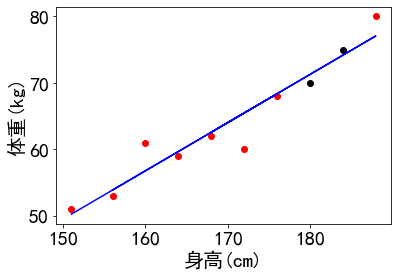

In [22]:
# 可视化
font={
    "family":"SimHei",
    "size":"20"
}
plt.rc("font",**font)
# 首先画一下给定的训练数据
plt.scatter(X_train,y_train,color='red')
# 画出训练好的线条
plt.plot(X_train,regr.predict(X_train),color='blue')
# 画一下测试数据
plt.scatter(X_test,y_test,color='black')
# 画出标签
plt.xlabel("身高(cm)")
plt.ylabel("体重(kg)")
plt.show()

In [23]:
# 输出一下在测试集上的R平方值
regr.score(X_test,y_test)

0.8160972571605684

In [24]:
regr.predict([[163]])

array([58.93997202])